In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
sns.set()

In [9]:
def parseEarningsSheet(path):
    df = pd.read_excel(path, skiprows=19, index_col='Year')
    df.index.name=None
    df['avg'] = df.mean(axis=1)
    return df

TypeError: parseEarningsSheet() got an unexpected keyword argument 'ax'

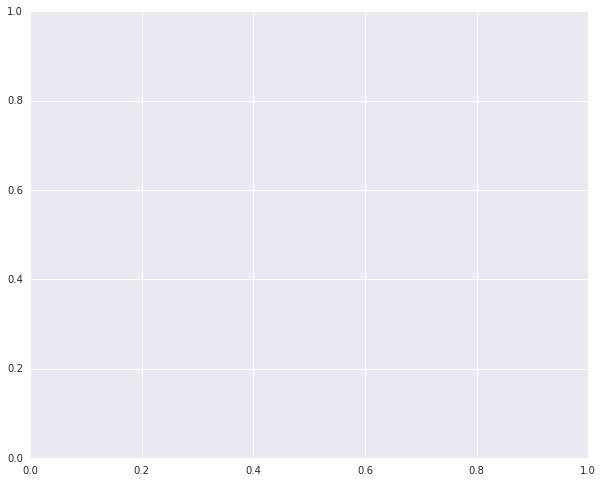

In [30]:
lths_earnings = parseEarningsSheet('lths_earnings.xlsx')
hs_earnings = parseEarningsSheet('hs_earnings.xlsx')
sc_earnings =parseEarningsSheet('sc_earnings.xlsx')
c_earnings = parseEarningsSheet('c_earnings.xlsx')

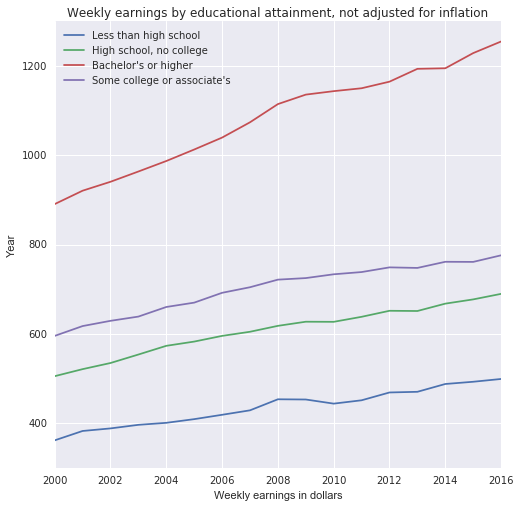

In [64]:
fig, ax = plt.subplots(figsize=(8,8))
lths_earnings.plot( y='avg', label='Less than high school', ax=ax)
hs_earnings.plot( y='avg', label='High school, no college', ax=ax)
c_earnings.plot( y='avg', label='Bachelor\'s or higher', ax=ax)
sc_earnings.plot( y='avg',  label='Some college or associate\'s', ax=ax)
plt.title("Weekly earnings by educational attainment, not adjusted for inflation")
plt.xlabel("Weekly earnings in dollars")
plt.ylabel('Year')
plt.show()

In [67]:
changeDict = {}
for df, k in zip([lths_earnings, hs_earnings, sc_earnings, c_earnings ], 
              ['Less than high school', 'High school', 'Some college or associate\'s', 'Bachelors or higher']):
    changeDict[k] = (df.loc[2016, 'avg'] - df.loc[2000, 'avg']) / df.loc[2000, 'avg']  

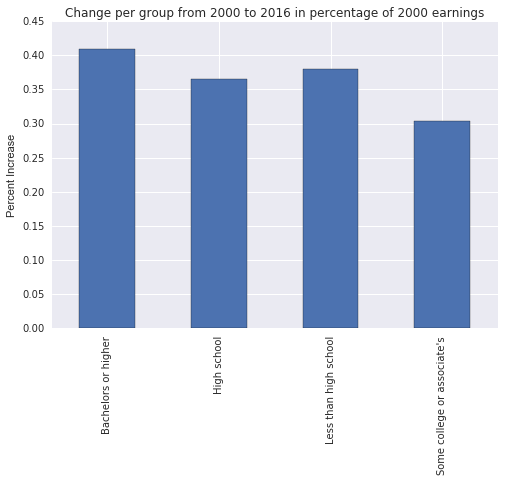

In [68]:
pd.Series(changeDict).plot.bar()
plt.title('Change per group from 2000 to 2016 in percentage of 2000 earnings')
plt.ylabel('Percent Increase')
plt.show()